In [2]:
#derived from songify.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'seaborn'

In [212]:
data_full = pd.read_csv("data.csv")
data = pd.read_csv("data_red.csv")
data_full.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


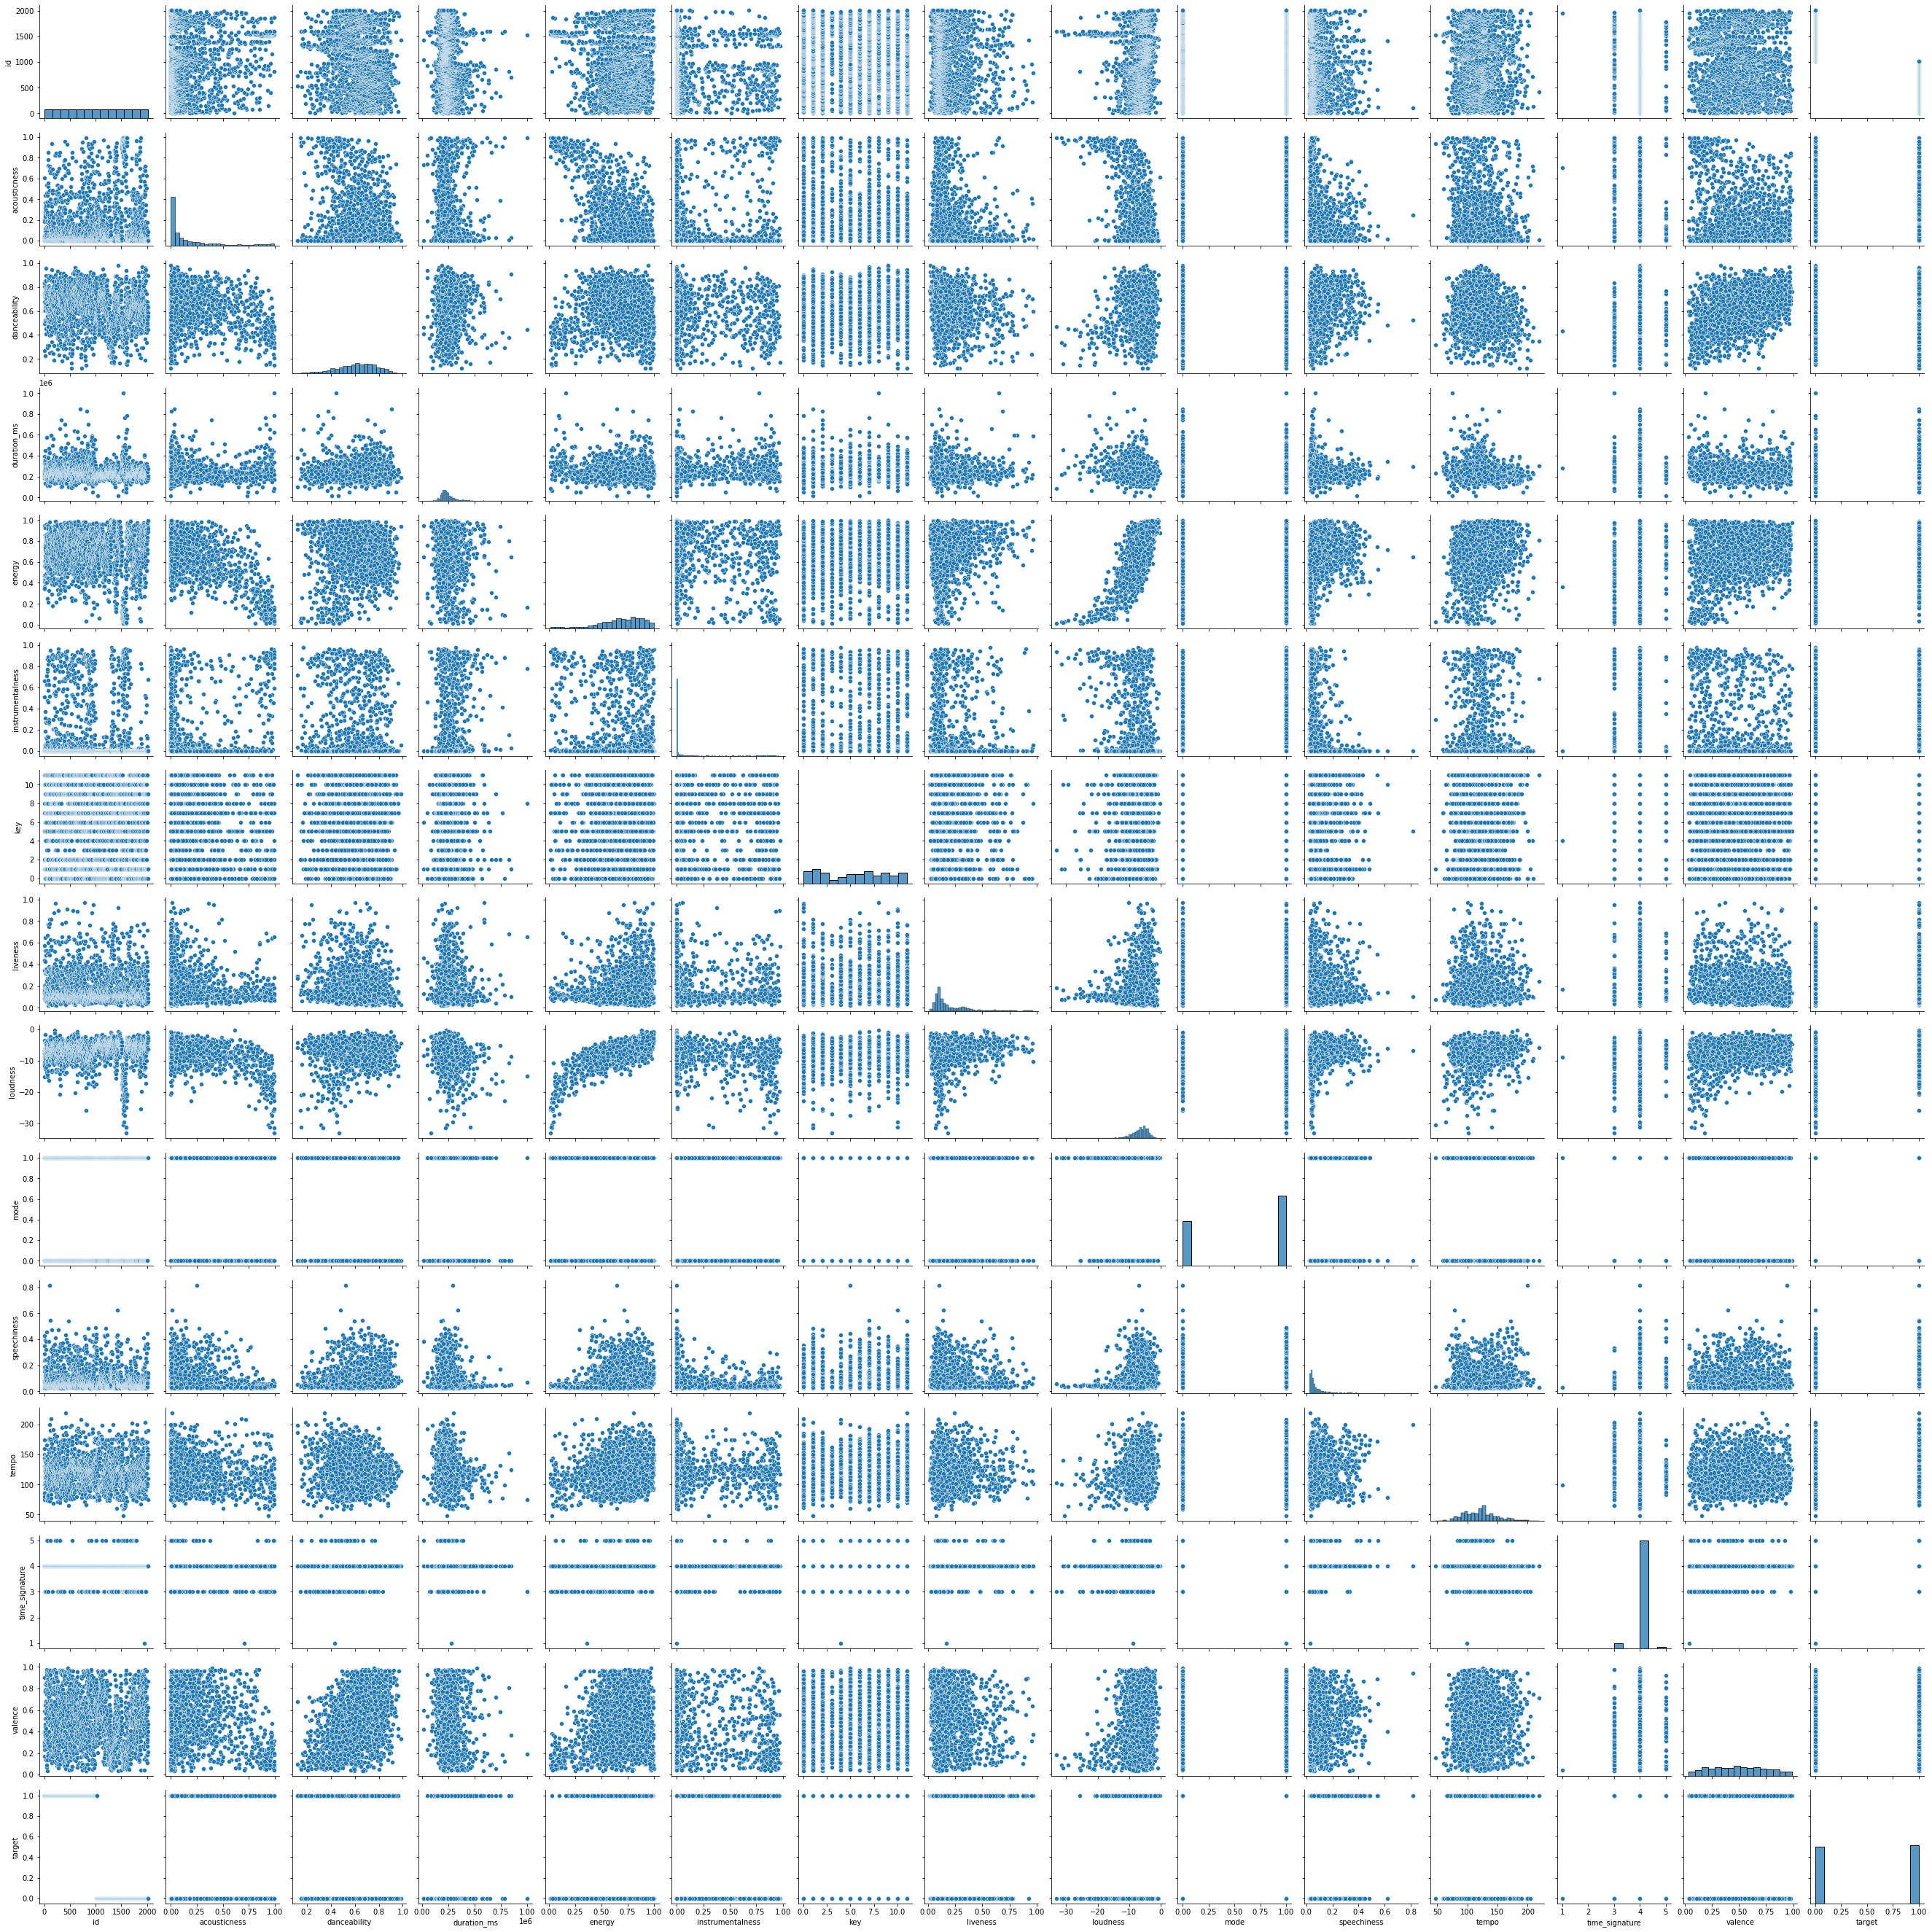

In [215]:
sns.pairplot(data)

In [216]:
# observations :
#     more danceability songs have more energy
#     more songs with less durations have : more loudness in general and less speechiness in general
#     more songs with high liveness have less speechiness
#     mode has no relation with other features, it is spread across uniformly
#     time_sign and target has no specific relationship with other features

In [218]:
data.corr()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
id,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


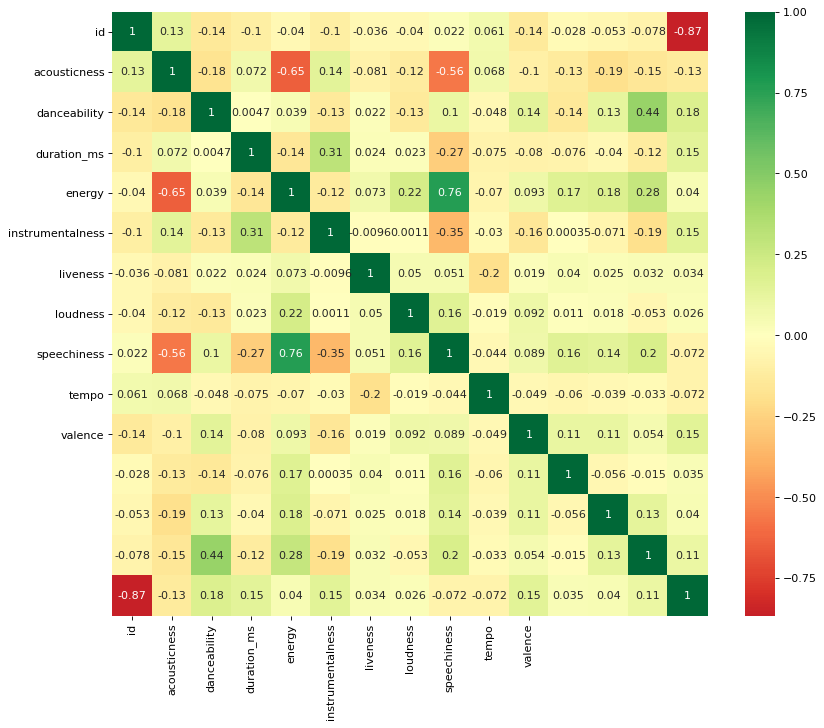

In [222]:
df_corr = pd.read_csv("data.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_corr.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.show()

In [223]:
#     observations :
#     acousticness -ve correlation with energy and loudness
#     energy positive correlation with loudness
#     danceability positive correlation with valence

In [209]:
data = data.drop(["target","key","mode","time_signature"],1)
df = data.copy()
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.0102,0.833,204600,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286
1,1,0.1990,0.743,326933,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588
2,2,0.0344,0.838,185707,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173
3,3,0.6040,0.494,199413,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230
4,4,0.1800,0.678,392893,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904


In [29]:
col = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

In [55]:
scaler = StandardScaler()
df[col]=scaler.fit_transform(df[col])

In [129]:
def find(id):
    b=0
    a=0
    song = []
    index =0
    for i in data["id"]:
        if id == i:
            b+=1
            song = np.array(data)[i]
            index = i
            #print("id : ",i,"acous ",data["acousticness"][i])
            break;
        a+=1
    if(b==0):
        print("nothing found.")
        return 0  
    return song, index

In [210]:
id = 2015
find(id) 

(array([ 2.01500e+03,  1.64000e-03,  5.57000e-01,  1.85600e+05,
         9.92000e-01,  6.77000e-01,  9.13000e-02, -2.73500e+00,
         1.33000e-01,  1.50011e+02,  6.23000e-01]),
 2015)

In [1]:
def similar_tracks(id):
    if (find(id) == 0):
        return 0
    else:
        x=find(id)[0]
        index = find(id)[1]
    no_of_rec = 10
    p = []
    count=0
    for i in data.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    song_ids = data["id"]
    print("\nSimilar songs to ",index,"-",data_full.loc[index].at["song_title"],"by ",data_full.loc[index].at["artist"],"\n")
    print ("\n{:<8} {:<10} {:<40} {:<10}\n".format('s.no','song_id','song_name','artist'))
    for i in range(1,no_of_rec):
        print ("{:<8} {:<10} {:<40} {:<10}".format('i',song_ids[p[i][1]],data_full.loc[song_ids[p[i][1]]].at["song_title"],data_full.loc[song_ids[p[i][1]]].at["artist"]))

In [211]:
id = 2015
similar_tracks(id)


Similar songs to  2015 - First Contact by  Twin Moons 


s.no     song_id    song_name                                artist    

i        1860       Lady Brain                               The Harmaleighs
i        1704       The One You Say Goodnight To             Kina Grannis
i        1978       Now I Do What I Want                     Lil Zay Poppin
i        1967       Hoochie Mama                             2 LIVE CREW
i        1816       Be My Baby                               Bea Miller
i        1811       Can't Blame a Girl for Trying            Sabrina Carpenter
i        1584       Biscuits in the Oven                     Raffi     
i        1947       There's No One Quite Like Grandma - 2003 Remastered Version St. Winifred's School Choir
i        1909       Wannabe - Radio Edit                     Spice Girls
